# Samuel Chiang USCID: 7187956023

## 1. Combined Cycle Power Plant Data Set
The dataset contains data points collected from a Combined Cycle Power Plant over 6 years (2006-2011), when the power plant was set to work with full load. Features consist of hourly average ambient variables Temperature (T), Ambient Pressure (AP), Relative Humidity (RH) and Exhaust Vacuum (V) to predict the net hourly electrical energy output (EP) of the plant.

In [1]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn import preprocessing
from regressors import stats

## (b) Exploring the data:

In [2]:
train_file = 'CCPP/Folds5x2_pp.xlsx'
columns=['Temperature', 'Exhaust Vacuum', 'Ambient Pressure', 'Relative Humidity', 'Energy Output']
variables=['Temperature', 'Exhaust Vacuum', 'Ambient Pressure', 'Relative Humidity']
cols = ['T', 'V', 'AP', 'RH', 'EP']
result_df = pd.DataFrame(columns=['Model','Mean Square Error'])
overall_train_error=[]
df = pd.read_excel(train_file, names=columns)
df

,Temperature,Exhaust Vacuum,Ambient Pressure,Relative Humidity,Energy Output
0,14.96,41.76,1024.07,73.17,463.26
1,25.18,62.96,1020.04,59.08,444.37
2,5.11,39.40,1012.16,92.14,488.56
3,20.86,57.32,1010.24,76.64,446.48
4,10.82,37.50,1009.23,96.62,473.90
5,26.27,59.44,1012.23,58.77,443.67
6,15.89,43.96,1014.02,75.24,467.35
7,9.48,44.71,1019.12,66.43,478.42
8,14.64,45.00,1021.78,41.25,475.98
9,11.74,43.56,1015.14,70.72,477.50


### i. How many rows are in this data set? How many columns? What do the rows and columns represent?

In [3]:
print("Rows: %d\nColumns: %d\n" %(df.shape[0], df.shape[1]))

Rows: 9568
Columns: 5



#### Each row represents a specific data point collected from a Combined Cycle Power Plant over the span of 6 years (2006-2011), when the power plant was set to work with full load. <br/> The first four columns consist of hourly average ambient variables Temperature (T), Ambient Pressure (AP), Relative Humidity (RH) and Exhaust Vacuum (V). These values are used to predict the net hourly electrical energy output (EP) of the plant, which is provided in the last column of each data point.

### ii. Make pairwise scatterplots of all the varianbles in the data set including the predictors (independent variables) with the dependent variable. Describe your findings.

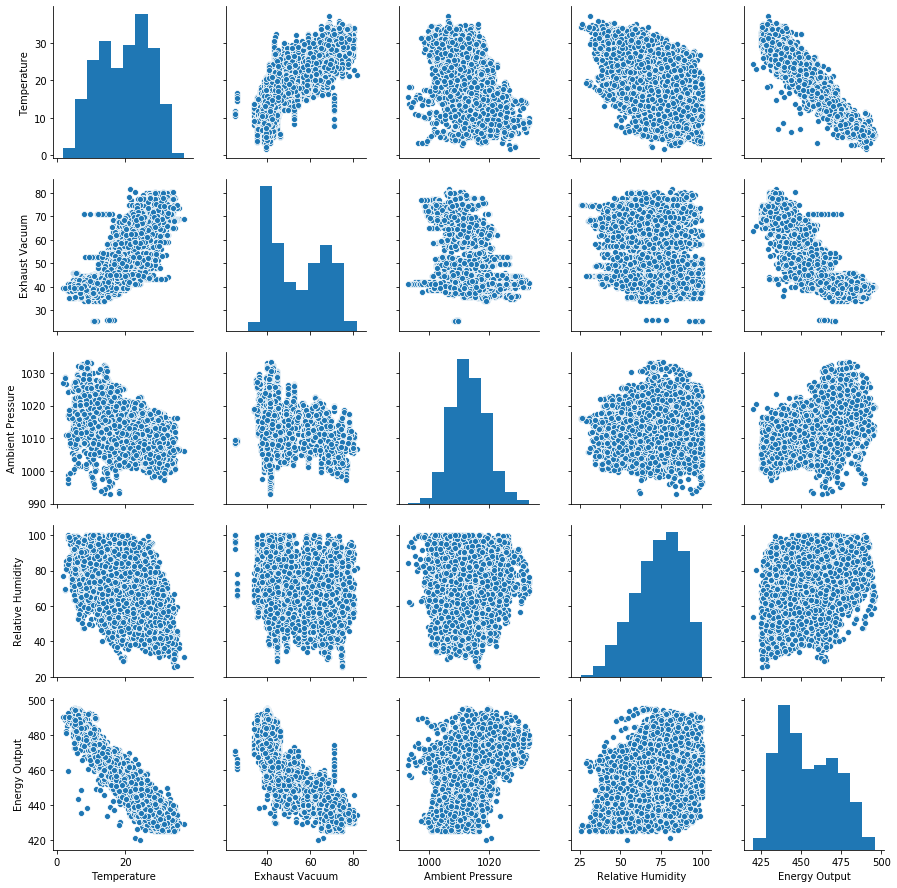

In [4]:
sns.pairplot(df)

#### Based on the scatter plots, we can see that the "Temperature" and "Exhaust Vacuum" variables have an evident linear relationship with the Energy Output. 

### iii. Mean, median, range, first and third quartiles, and interquartile ranges of each variable

In [5]:
description = df.describe()
description=description.transpose()
description['Interquartile']=description.apply(lambda var: var['75%'] - var['25%'], axis=1)
description['Range']=description.apply(lambda var: var['max'] - var['min'], axis=1)
description = description[['mean','min','25%','50%','75%','Interquartile','Range']]
description

,mean,min,25%,50%,75%,Interquartile,Range
Temperature,19.651231,1.81,13.5100,20.345,25.72,12.2100,35.30
Exhaust Vacuum,54.305804,25.36,41.7400,52.080,66.54,24.8000,56.20
Ambient Pressure,1013.259078,992.89,1009.1000,1012.940,1017.26,8.1600,40.41
Relative Humidity,73.308978,25.56,63.3275,74.975,84.83,21.5025,74.60
Energy Output,454.365009,420.26,439.7500,451.550,468.43,28.6800,75.50


## (c) For each predictor, fit a simple linear regression model to predict the response. Describe your results. In which of the models is there a statistically significant association between the predictor and the response? Create some plots to back up your assertions. Are there any outliers that you would like to remove from your data for each of these regression tasks?

### Linear regression models:

/usr/local/lib/python3.6/site-packages/sklearn/linear_model/base.py:503: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  linalg.lstsq(X, y)



Temperaturevs. Energy Output Summary
Residuals:
     Min     1Q  Median      3Q      Max
-23.2512 -3.696 -0.1009  3.6436  45.9509


Coefficients:
             Estimate  Std. Error    t value  p value
_intercept  497.03412    0.156268  3180.6524      0.0
x1           -2.17132    0.002941  -738.3933      0.0
---
R-squared:  0.89895,    Adjusted R-squared:  0.89894
F-statistic: 85097.76 on 1 features

Exhaust Vacuumvs. Energy Output Summary
Residuals:
     Min    1Q  Median     3Q      Max
-39.9596 -5.42  0.0726  5.314  37.0276


Coefficients:
              Estimate  Std. Error    t value  p value
_intercept  517.801526    0.377801  1370.5685      0.0
x1           -1.168135    0.001658  -704.5223      0.0
---
R-squared:  0.75652,    Adjusted R-squared:  0.75649
F-statistic: 29722.29 on 1 features

Ambient Pressurevs. Energy Output Summary
Residuals:
    Min      1Q  Median       3Q      Max
-60.252 -9.8014  3.0086  11.1143  43.7469


Coefficients:
               Estimate  Std. Error   t 

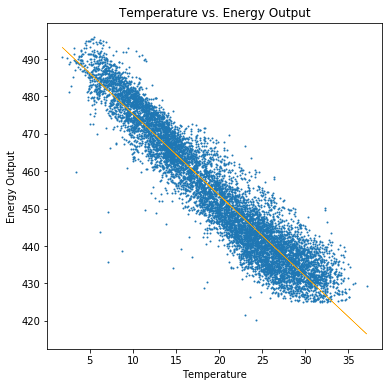

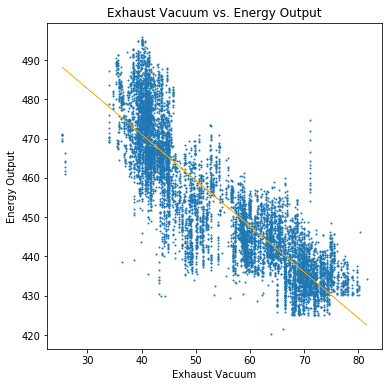

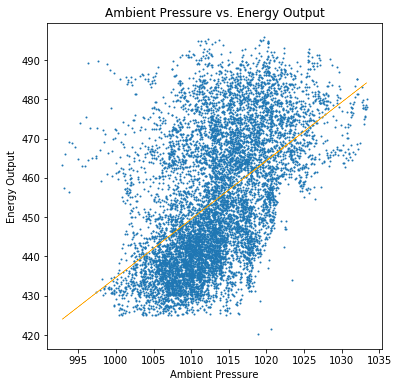

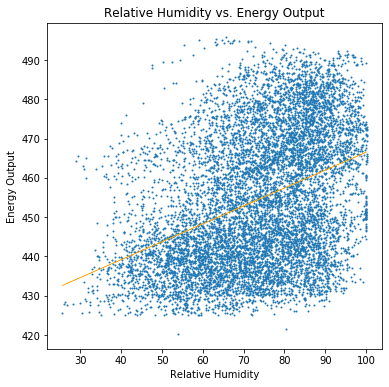

In [6]:
single_df = []
columns=['Temperature', 'Exhaust Vacuum', 'Ambient Pressure', 'Relative Humidity']

for var in columns:
    lr=LinearRegression()
    x = df[var].values
    x = x.reshape(x.shape[0], 1)
    y = df['Energy Output'].values
    y = y.reshape(y.shape[0], 1)
    lr.fit(x,y)
    print("\n" + var +  "vs. Energy Output Summary")
    stats.summary(lr, x, y)
    single_df.append(lr.coef_[0][0])
    
    plt.figure(figsize=(6,6))
    plt.scatter(x=df[var].values,y=df['Energy Output'].values, s=1)
    plt.plot(x, lr.predict(x), color='orange', linewidth=0.5)
    plt.title(var + ' vs. Energy Output')
    plt.xlabel(var)
    plt.ylabel('Energy Output')

#### In all plots, there is a clear association between the predictor function line and the data points. In each of the variables tested, there were no p-values greater than 0.05, which also proves that each variable is a significant feature.

### Boxplot of Temperature

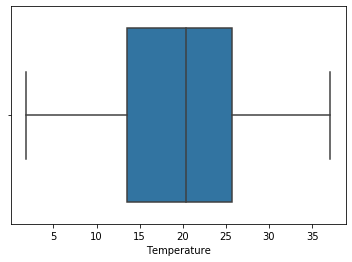

In [7]:
sns.boxplot(x=df['Temperature'])

#### There are no outliers

### Boxplot of Exhaust Vacuum

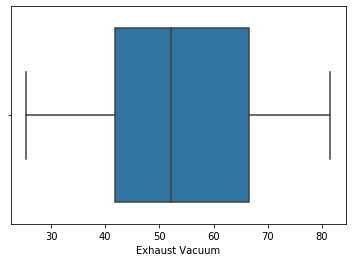

In [8]:
sns.boxplot(x=df['Exhaust Vacuum'])

#### There are no outliers

### Boxplot of Ambient Pressure

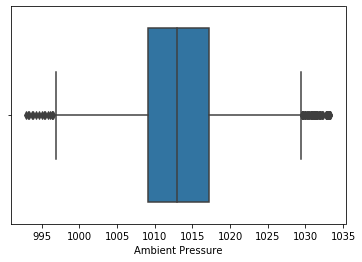

In [9]:
sns.boxplot(x=df['Ambient Pressure'])

#### Values under 997 or above 1029 are considered outliers.

### Boxplot of Relative Humidity

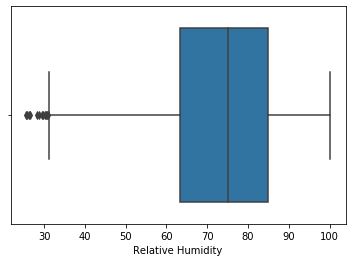

In [10]:
sns.boxplot(x=df['Relative Humidity'])

#### Values under 31 are considered outliers.

## (d) Multiple Regression Model

In [11]:
multi_df=[]
x = df.iloc[:,0:4]
y = df['Energy Output']
lr = LinearRegression()
lr.fit(x,y)
stats.summary(lr, x, y)
for i in range(len(list(x))):
    multi_df.append(lr.coef_[i])

Residuals:
     Min      1Q  Median     3Q      Max
-17.7777 -3.2008  0.1177  3.166  43.4354


Coefficients:
              Estimate  Std. Error   t value  p value
_intercept  454.609274    9.745958   46.6459      0.0
x1           -1.977513    0.012978 -152.3777      0.0
x2           -0.233916    0.005588  -41.8605      0.0
x3            0.062083    0.000088  702.9612      0.0
x4           -0.158054    0.003557  -44.4405      0.0
---
R-squared:  0.92870,    Adjusted R-squared:  0.92867
F-statistic: 31138.27 on 4 features


#### All p values are less than 0.05, therefore the null hypothesis can rejected for all of them.

### (e) Create a plot displaying the univariate regression coefficients from 1c on the x-axis, and the multiple regression coefficients from 1d on the y-axis. 

Text(0.5, 1.0, 'Single/Multiple Regression Coefficients')

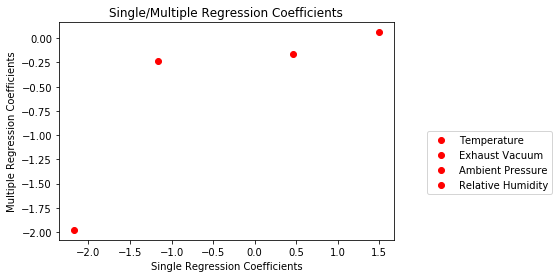

In [12]:
for i in range(len(variables)):
    plt.plot(single_df[i], multi_df[i], 'ro', label=variables[i])
plt.legend(bbox_to_anchor = [1.1,0.5],loc = 2,borderaxespad = 0)
plt.xlabel('Single Regression Coefficients')
plt.ylabel('Multiple Regression Coefficients')
plt.title('Single/Multiple Regression Coefficients')

## (f) Is there evidence of nonlinear association between any of the predictors and the response? To answer this question, for each predictor X, fit a model of the form: Y =β0 +β1X+β2X2 +β3X3 +ε

### Temperature

In [13]:
f = 'Q("Energy Output") ~ Temperature + I(Temperature**2) + I (Temperature**3)'
model = smf.ols(formula=f, data=df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     Q("Energy Output")   R-squared:                       0.912
Model:                            OLS   Adj. R-squared:                  0.912
Method:                 Least Squares   F-statistic:                 3.299e+04
Date:                Mon, 10 Jun 2019   Prob (F-statistic):               0.00
Time:                        17:34:14   Log-Likelihood:                -29101.
No. Observations:                9568   AIC:                         5.821e+04
Df Residuals:                    9564   BIC:                         5.824e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept             492.7281      0.673    732.248      0.000     491.409     494.047
Temperature            -0.6103      0.124     -4.941      0.000      -0.852      -0.368
I(Temperature ** 2)    -0.1251      0.007    -18.199      0.000      -0.139      -0.112
I(Temperature ** 3)     0.0027      0.000     22.594      0.000       0.002       0.003
==============================================================================
Omnibus:                      648.041   Durbin-Watson:                   2.033
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2767.059
Skew:                          -0.191   Prob(JB):                         0.00
Kurtosis:                       5.607   Cond. No.                     1.90e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.9e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### All features are significant, therefore Temperature is a nonlinear association.

### Exhaust Vacuum

In [14]:
f = 'Q("Energy Output") ~ Q("Exhaust Vacuum") + I(Q("Exhaust Vacuum")**2) + I (Q("Exhaust Vacuum")**3)'
model = smf.ols(formula=f, data=df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     Q("Energy Output")   R-squared:                       0.775
Model:                            OLS   Adj. R-squared:                  0.775
Method:                 Least Squares   F-statistic:                 1.098e+04
Date:                Mon, 10 Jun 2019   Prob (F-statistic):               0.00
Time:                        17:34:14   Log-Likelihood:                -33585.
No. Observations:                9568   AIC:                         6.718e+04
Df Residuals:                    9564   BIC:                         6.721e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===============================================================================================
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept                     554.1468      9.151     60.557      0.000     536.209     572.084
Q("Exhaust Vacuum")            -2.1444      0.509     -4.214      0.000      -3.142      -1.147
I(Q("Exhaust Vacuum") ** 2)    -0.0027      0.009     -0.294      0.768      -0.021       0.015
I(Q("Exhaust Vacuum") ** 3)     0.0001   5.45e-05      2.465      0.014    2.75e-05       0.000
==============================================================================
Omnibus:                      160.101   Durbin-Watson:                   2.009
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              279.778
Skew:                          -0.125   Prob(JB):                     1.77e-61
Kurtosis:                       3.800   Cond. No.                     2.47e+07
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.47e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### Although Q("Exhaust Vacuum") ** 2 maybe insignificant due to the large p-value, Q("Exhaust Vacuum") ** 3  has a p-value smaller than 0.05, therefore Exhaust Vacuum is likely a nonlinear association.

### Ambient Pressure

In [15]:
f = 'Q("Energy Output") ~ Q("Ambient Pressure") + I(Q("Ambient Pressure")**2) + I (Q("Ambient Pressure")**3)'
model = smf.ols(formula=f, data=df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     Q("Energy Output")   R-squared:                       0.275
Model:                            OLS   Adj. R-squared:                  0.275
Method:                 Least Squares   F-statistic:                     1813.
Date:                Mon, 10 Jun 2019   Prob (F-statistic):               0.00
Time:                        17:34:14   Log-Likelihood:                -39184.
No. Observations:                9568   AIC:                         7.837e+04
Df Residuals:                    9565   BIC:                         7.840e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=================================================================================================
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
Intercept                         0.0747      0.009      8.415      0.000       0.057       0.092
Q("Ambient Pressure")            25.2556      3.001      8.415      0.000      19.372      31.139
I(Q("Ambient Pressure") ** 2)    -0.0500      0.006     -8.439      0.000      -0.062      -0.038
I(Q("Ambient Pressure") ** 3)  2.514e-05   2.92e-06      8.613      0.000    1.94e-05    3.09e-05
==============================================================================
Omnibus:                      556.766   Durbin-Watson:                   1.997
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              640.319
Skew:                           0.621   Prob(JB):                    9.05e-140
Kurtosis:                       2.751   Cond. No.                     2.12e+15
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.12e+15. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### All features are significant, therefore Ambient Pressure is a nonlinear association.

### Relative Humidity

In [16]:
f = 'Q("Energy Output") ~ Q("Relative Humidity") + I(Q("Relative Humidity")**2) + I (Q("Relative Humidity")**3)'
model = smf.ols(formula=f, data=df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     Q("Energy Output")   R-squared:                       0.154
Model:                            OLS   Adj. R-squared:                  0.153
Method:                 Least Squares   F-statistic:                     579.2
Date:                Mon, 10 Jun 2019   Prob (F-statistic):               0.00
Time:                        17:34:14   Log-Likelihood:                -39923.
No. Observations:                9568   AIC:                         7.985e+04
Df Residuals:                    9564   BIC:                         7.988e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==================================================================================================
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
Intercept                        468.4135     10.545     44.422      0.000     447.744     489.083
Q("Relative Humidity")            -1.7292      0.486     -3.557      0.000      -2.682      -0.776
I(Q("Relative Humidity") ** 2)     0.0321      0.007      4.433      0.000       0.018       0.046
I(Q("Relative Humidity") ** 3)    -0.0002   3.51e-05     -4.340      0.000      -0.000   -8.34e-05
==============================================================================
Omnibus:                      707.867   Durbin-Watson:                   1.998
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              302.057
Skew:                           0.223   Prob(JB):                     2.56e-66
Kurtosis:                       2.253   Cond. No.                     3.26e+07
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.26e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### All features are significant, therefore Relative Humidity is a nonlinear association.

## (g) Run a full linear regression model with all pairwise interaction terms and state whether any interaction terms are statistically significant.

In [17]:
#gather all possible pairs of variables (except for EP)
f = 'Q("Energy Output") ~ Temperature + Q("Exhaust Vacuum") + Q("Ambient Pressure") \
+ Q("Relative Humidity") + Temperature * Q("Exhaust Vacuum") + Temperature * Q("Ambient Pressure") \
+ Temperature * Q("Relative Humidity") + Q("Exhaust Vacuum") * Q("Ambient Pressure") + \
Q("Exhaust Vacuum")* Q("Relative Humidity") + Q("Ambient Pressure") * Q("Relative Humidity")'
model = smf.ols(formula = f, data = df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     Q("Energy Output")   R-squared:                       0.936
Model:                            OLS   Adj. R-squared:                  0.936
Method:                 Least Squares   F-statistic:                 1.405e+04
Date:                Mon, 10 Jun 2019   Prob (F-statistic):               0.00
Time:                        17:34:14   Log-Likelihood:                -27548.
No. Observations:                9568   AIC:                         5.512e+04
Df Residuals:                    9557   BIC:                         5.520e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
================================================================================================================
                                                   coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------
Intercept                                      685.7825     78.640      8.721      0.000     531.631     839.934
Temperature                                     -4.3470      2.373     -1.832      0.067      -8.999       0.305
Q("Exhaust Vacuum")                             -7.6749      1.351     -5.682      0.000     -10.323      -5.027
Q("Ambient Pressure")                           -0.1524      0.077     -1.983      0.047      -0.303      -0.002
Q("Relative Humidity")                           1.5709      0.773      2.031      0.042       0.055       3.087
Temperature:Q("Exhaust Vacuum")                  0.0210      0.001     23.338      0.000       0.019       0.023
Temperature:Q("Ambient Pressure")                0.0018      0.002      0.752      0.452      -0.003       0.006
Temperature:Q("Relative Humidity")              -0.0052      0.001     -6.444      0.000      -0.007      -0.004
Q("Exhaust Vacuum"):Q("Ambient Pressure")        0.0068      0.001      5.135      0.000       0.004       0.009
Q("Exhaust Vacuum"):Q("Relative Humidity")       0.0008      0.000      1.716      0.086      -0.000       0.002
Q("Ambient Pressure"):Q("Relative Humidity")    -0.0016      0.001     -2.125      0.034      -0.003      -0.000
==============================================================================
Omnibus:                     1454.609   Durbin-Watson:                   2.030
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             9170.848
Skew:                          -0.574   Prob(JB):                         0.00
Kurtosis:                       7.657   Cond. No.                     1.70e+08
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.7e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### According to the p-values (greater than 0.05), Temperature, Temperature: Ambient Pressure, and Exhaust Vacuum: Relative Humidity are statistically insignificant. 

## (h) Train the regression model on a randomly selected 70% subset of the data with all predictors. Also, run a regression model involving all possible interaction terms and quadratic nonlinearities, and remove insignificant variables using p-values (be careful about interaction terms). Test both models on the remaining points and report your train and test MSEs.

### Multiple Linear Regression

In [18]:
x_train, x_test, y_train, y_test = train_test_split(
    df[['Temperature', 'Exhaust Vacuum', 'Ambient Pressure', 'Relative Humidity']], 
    df['Energy Output'], test_size=0.3, random_state=30)
lr=LinearRegression()
lr.fit(x_train, y_train)
y_train_pred = lr.predict(x_train)
y_test_pred = lr.predict(x_test)

test_error = mean_squared_error(y_test, y_test_pred)
train_error = mean_squared_error(y_train, y_train_pred)
print('Multiple Linear Regression Model')
print('Train Error:', train_error)
print('Test Error:', test_error)
result_df.loc[0] = ['Multiple Linear Regression - Train Data', train_error]
result_df.loc[1] = ['Multiple Linear Regression - Test Data', train_error]

Multiple Linear Regression Model
Train Error: 21.10238757312769
Test Error: 20.011713842528565


### Linear regression model with all possible pairwise interaction terms and quadratic nonlinearities

In [19]:
# Linear regression model with all possible pairwise interaction terms and quadratic nonlinearities
x_train, x_test, y_train, y_test = train_test_split(
    df[['Temperature', 'Exhaust Vacuum', 'Ambient Pressure', 'Relative Humidity']], 
    df['Energy Output'], test_size=0.3, random_state=30)
train_df = x_train.merge(y_train.to_frame(), how='outer', left_index=True, right_index=True)
test_df = x_test.merge(y_test.to_frame(), how='outer', left_index=True, right_index=True)

f = 'Q("Energy Output") ~ Temperature + Q("Exhaust Vacuum") + Q("Ambient Pressure") \
+ Q("Relative Humidity") + Temperature * Q("Exhaust Vacuum") + Temperature * Q("Ambient Pressure") \
+ Temperature * Q("Relative Humidity") + Q("Exhaust Vacuum") * Q("Ambient Pressure") + \
Q("Exhaust Vacuum")* Q("Relative Humidity") + Q("Ambient Pressure") * Q("Relative Humidity") + \
I(Temperature**2) + I(Q("Exhaust Vacuum")**2) + I(Q("Ambient Pressure")**2) + I(Q("Relative Humidity")**2)'
model = smf.ols(formula = f, data=train_df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     Q("Energy Output")   R-squared:                       0.936
Model:                            OLS   Adj. R-squared:                  0.936
Method:                 Least Squares   F-statistic:                     6977.
Date:                Mon, 10 Jun 2019   Prob (F-statistic):               0.00
Time:                        17:34:14   Log-Likelihood:                -19277.
No. Observations:                6697   AIC:                         3.858e+04
Df Residuals:                    6682   BIC:                         3.869e+04
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
================================================================================================================
                                                   coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------
Intercept                                    -7445.9848   1455.959     -5.114      0.000   -1.03e+04   -4591.840
Temperature                                     -4.7301      3.694     -1.280      0.200     -11.972       2.511
Q("Exhaust Vacuum")                             -3.1320      1.777     -1.762      0.078      -6.616       0.352
Q("Ambient Pressure")                           15.5188      2.822      5.499      0.000       9.987      21.051
Q("Relative Humidity")                           3.6422      1.058      3.441      0.001       1.568       5.717
Temperature:Q("Exhaust Vacuum")                  0.0132      0.003      4.065      0.000       0.007       0.020
Temperature:Q("Ambient Pressure")                0.0022      0.004      0.604      0.546      -0.005       0.009
Temperature:Q("Relative Humidity")              -0.0074      0.002     -4.076      0.000      -0.011      -0.004
Q("Exhaust Vacuum"):Q("Ambient Pressure")        0.0026      0.002      1.518      0.129      -0.001       0.006
Q("Exhaust Vacuum"):Q("Relative Humidity")       0.0012      0.001      1.525      0.127      -0.000       0.003
Q("Ambient Pressure"):Q("Relative Humidity")    -0.0034      0.001     -3.299      0.001      -0.005      -0.001
I(Temperature ** 2)                              0.0142      0.004      3.817      0.000       0.007       0.022
I(Q("Exhaust Vacuum") ** 2)                     -0.0016      0.001     -1.697      0.090      -0.003       0.000
I(Q("Ambient Pressure") ** 2)                   -0.0076      0.001     -5.525      0.000      -0.010      -0.005
I(Q("Relative Humidity") ** 2)                  -0.0018      0.000     -5.777      0.000      -0.002      -0.001
==============================================================================
Omnibus:                     1384.417   Durbin-Watson:                   2.015
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            11252.041
Skew:                          -0.763   Prob(JB):                         0.00
Kurtosis:                       9.164   Cond. No.                     2.85e+10
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.85e+10. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### When studying the graph outputted by the regression model, we can notice that: <br> Temperature:Ambient Pressure, Exhaust Vacuum:Ambient Pressure, Exhaust Vacuum:Relative Humidity, and Exhaust Vacuum**2 <br> are insignificant due to their p-values. We can try removing them and run the linear regression model again.

In [20]:
f = 'Q("Energy Output") ~ Temperature + Q("Exhaust Vacuum") + Q("Ambient Pressure") + Q("Relative Humidity") + \
Temperature * Q("Exhaust Vacuum") + Temperature * Q("Relative Humidity") + Q("Ambient Pressure") * Q("Relative Humidity") \
+ I(Temperature**2) + I(Q("Ambient Pressure")**2) + I(Q("Relative Humidity")**2)'
model = smf.ols(formula = f, data=train_df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     Q("Energy Output")   R-squared:                       0.936
Model:                            OLS   Adj. R-squared:                  0.936
Method:                 Least Squares   F-statistic:                     9753.
Date:                Mon, 10 Jun 2019   Prob (F-statistic):               0.00
Time:                        17:34:15   Log-Likelihood:                -19284.
No. Observations:                6697   AIC:                         3.859e+04
Df Residuals:                    6686   BIC:                         3.866e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
================================================================================================================
                                                   coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------
Intercept                                    -9886.8357   1107.869     -8.924      0.000   -1.21e+04   -7715.059
Temperature                                     -2.4100      0.103    -23.509      0.000      -2.611      -2.209
Q("Exhaust Vacuum")                             -0.4328      0.032    -13.414      0.000      -0.496      -0.370
Q("Ambient Pressure")                           20.0661      2.190      9.164      0.000      15.774      24.358
Q("Relative Humidity")                           4.9097      0.768      6.395      0.000       3.405       6.415
Temperature:Q("Exhaust Vacuum")                  0.0069      0.001      4.689      0.000       0.004       0.010
Temperature:Q("Relative Humidity")              -0.0065      0.001     -7.301      0.000      -0.008      -0.005
Q("Ambient Pressure"):Q("Relative Humidity")    -0.0046      0.001     -6.182      0.000      -0.006      -0.003
I(Temperature ** 2)                              0.0178      0.002      7.686      0.000       0.013       0.022
I(Q("Ambient Pressure") ** 2)                   -0.0097      0.001     -8.941      0.000      -0.012      -0.008
I(Q("Relative Humidity") ** 2)                  -0.0018      0.000     -6.426      0.000      -0.002      -0.001
==============================================================================
Omnibus:                     1383.204   Durbin-Watson:                   2.015
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            10931.012
Skew:                          -0.771   Prob(JB):                         0.00
Kurtosis:                       9.066   Cond. No.                     2.17e+10
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.17e+10. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [21]:
y_train_pred = model.predict(train_df)
y_test_pred = model.predict(test_df)

test_error = mean_squared_error(y_test, y_test_pred)
train_error = mean_squared_error(y_train, y_train_pred)
print('Full Linear Regression Model with all Possible Pairwise Interaction Terms & Quadratic Nonlinearities:')
print('Train Error:', train_error)
print('Test Error:', test_error)
result_df.loc[2] = ['Full Linear Regression - Train Data', train_error]
result_df.loc[3] = ['Full Linear Regression - Test Data', test_error]

Full Linear Regression Model with all Possible Pairwise Interaction Terms & Quadratic Nonlinearities:
Train Error: 18.55940418362307
Test Error: 17.206734243663245


## (i) KNN Regression with normalized and raw features

### Raw Features

Best k is at k = 7 with test error of 15.386980.


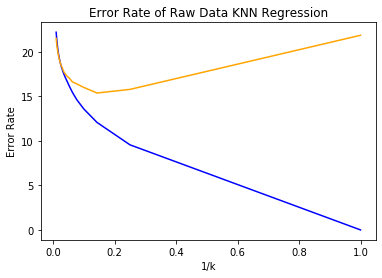

In [22]:
k_values = np.arange(1,103,3)
x_train, x_test, y_train, y_test = train_test_split(
    df[['Temperature', 'Exhaust Vacuum', 'Ambient Pressure', 'Relative Humidity']], 
    df['Energy Output'], test_size=0.3, random_state=30)

train_errors = []
test_errors = []
for k in k_values:
    knn = KNeighborsRegressor(k, metric = "euclidean")
    knn.fit(x_train, y_train)
    train_predict = knn.predict(x_train)
    test_predict = knn.predict(x_test)
    train_error=mean_squared_error(y_train, train_predict)
    test_error=mean_squared_error(y_test, test_predict)
    train_errors.append(train_error)
    test_errors.append(test_error)
    
plt.plot([1 / k for k in k_values] ,train_errors, color = 'blue',label = 'Train')
plt.plot([1 / k for k in k_values]  ,test_errors, color = 'orange',label = 'Test')
plt.title('Error Rate of Raw Data KNN Regression')
plt.xlabel('1/k')
plt.ylabel('Error Rate')
# plt.legend(bbox_to_anchor = [1.05,1],loc = 2,borderaxespad = 0)

print('Best k is at k = %d with test error of %f.' %(k_values[test_errors.index(min(test_errors))], min(test_errors)))

result_df.loc[4] = ['Raw KNN Regression - Train Data', min(train_errors)]
result_df.loc[5] = ['Raw KNN Regression - Test Data', min(test_errors)]

### Normalized Features

In [23]:
norm_df = df[['Temperature', 'Exhaust Vacuum', 'Ambient Pressure', 'Relative Humidity']]
x = norm_df.values
min_max_scaler = preprocessing.MinMaxScaler() # Use sklearn MinMaxScaler() to normalize features
norm_df = pd.DataFrame(min_max_scaler.fit_transform(x))
norm_df.columns = ['Temperature', 'Exhaust Vacuum', 'Ambient Pressure', 'Relative Humidity']
norm_df

,Temperature,Exhaust Vacuum,Ambient Pressure,Relative Humidity
0,0.372521,0.291815,0.771591,0.638204
1,0.662040,0.669039,0.671863,0.449330
2,0.093484,0.249822,0.476862,0.892493
3,0.539660,0.568683,0.429349,0.684718
4,0.255241,0.216014,0.404355,0.952547
5,0.692918,0.606406,0.478594,0.445174
6,0.398867,0.330961,0.522890,0.665952
7,0.217280,0.344306,0.649097,0.547855
8,0.363456,0.349466,0.714922,0.210322
9,0.281303,0.323843,0.550606,0.605362


Best k is at k = 4 with test error of 13.903014.


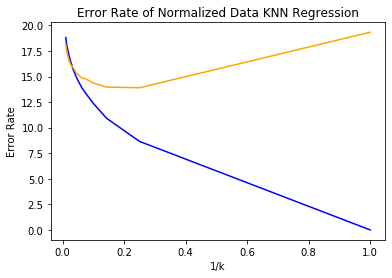

In [24]:
x_train, x_test, y_train, y_test = train_test_split(
    norm_df, 
    df['Energy Output'], test_size=0.3, random_state=30)

train_errors = []
test_errors = []
for k in k_values:
    knn = KNeighborsRegressor(k, metric = "euclidean")
    knn.fit(x_train, y_train)
    train_predict = knn.predict(x_train)
    test_predict = knn.predict(x_test)
    train_error=mean_squared_error(y_train, train_predict)
    test_error=mean_squared_error(y_test, test_predict)
    train_errors.append(train_error)
    test_errors.append(test_error)

plt.plot([1 / k for k in k_values] ,train_errors, color = 'blue',label = 'Train')
plt.plot([1 / k for k in k_values]  ,test_errors, color = 'orange',label = 'Test')
plt.title('Error Rate of Normalized Data KNN Regression')
plt.xlabel('1/k')
plt.ylabel('Error Rate')
# plt.legend(bbox_to_anchor = [1.05,1],loc = 2,borderaxespad = 0)

print('Best k is at k = %d with test error of %f.' %(k_values[test_errors.index(min(test_errors))], min(test_errors)))
result_df.loc[6] = ['Normalized KNN Regression - Train Data', min(train_errors)]
result_df.loc[7] = ['Normalized KNN Regression - Test Data', min(test_errors)]

## (j) Results Comparism

In [25]:
result_df

,Model,Mean Square Error
0,Multiple Linear Regression - Train Data,21.102388
1,Multiple Linear Regression - Test Data,21.102388
2,Full Linear Regression - Train Data,18.559404
3,Full Linear Regression - Test Data,17.206734
4,Raw KNN Regression - Train Data,0.000000
5,Raw KNN Regression - Test Data,15.386980
6,Normalized KNN Regression - Train Data,0.000000
7,Normalized KNN Regression - Test Data,13.903014


#### From our results shown in our graph, it is obvious that we conclude that the KNN Regression Model is more optimal than the Linear Regression Models for this dataset.

## ISLR: 2.4.1

### For each of parts (a) through (d), indicate whether we would generally expect the performance of a flexible statistical learning method to be better or worse than an inflexible method. Justify your answer.

#### (a) The sample size n is extremely large, and the number of predictors p is small.

#### Ans: 
Small numbers of predictors result in less variance. In order to try and fit an extremely large sample size of points with a limited amount of predictors, a flexible learning method is recommended.

#### (b) The number of predictors p is extremely large, and the number of observations n is small.

#### Ans: 
With a large number of predictors, a flexible method might result in an overfit. An inflexible method would be recommended.

#### (c) The relationship between the predictors and response is highly non-linear.

#### Ans: 
If the relationship is non-linear, a flexible method would be better. This will result in a flexible plot.

#### (d) The variance of the error terms, i.e. σ2 = Var(ε), is extremely high.

#### Ans: 
High variance means there is a lot of noise in the data. Since a flexible method will try to adjust to all the noise, an inflexible method would likely do better.

## ISLR: 2.4.7

#### The table below provides a training data set containing six observations, three predictors, and one qualitative response variable. <br> Obs:  X1 X2 X3 &nbsp; &nbsp;&nbsp;  Y <br> &nbsp;&nbsp;&nbsp;   1&nbsp;&nbsp;  0 &nbsp;&nbsp;  3  &nbsp;&nbsp;  0  &nbsp;&nbsp; Red <br>  &nbsp;&nbsp;&nbsp;   2&nbsp;&nbsp;  2 &nbsp;&nbsp;  0  &nbsp;&nbsp;  0  &nbsp;&nbsp; Red <br>  &nbsp;&nbsp;&nbsp;   3&nbsp;&nbsp;  0 &nbsp;&nbsp;  1  &nbsp;&nbsp;  3  &nbsp;&nbsp; Red <br>  &nbsp;&nbsp;&nbsp;   4&nbsp;&nbsp;  0 &nbsp;&nbsp;  1 &nbsp;&nbsp;  2  &nbsp;&nbsp; Green <br>  &nbsp;&nbsp;&nbsp;   5&nbsp; -1 &nbsp;&nbsp;  0  &nbsp;&nbsp;  1  &nbsp;&nbsp; Green <br>  &nbsp;&nbsp;&nbsp;   6 &nbsp;&nbsp;  1 &nbsp;&nbsp;  1  &nbsp;&nbsp;  1  &nbsp;&nbsp; Red <br> Suppose we wish to use this data set to make a prediction for Y when X1 = X2 = X3 = 0 using K-nearest neighbors.

#### (a) Compute the Euclidean distance between each observation and the test point,X1 =X2 =X3 =0.

#### Ans: 
We calculate the distance from Euclidean distance from each data point to the test point. <br> 1.  0    3    0    Red ==> Distance: 3 <br> 2.  2    0    0    Red ==> Distance: 2 <br> 3.  0    1    3    Red ==> Distance: 3.16 <br> 4.  0    1    2    Green ==> Distance: 2.24 <br> 5.  -1    0    1    Green ==> Distance: 1.41 <br> 6.  1    1    1    Red ==> Distance: 1.73 

#### (b) What is our prediction with K = 1? Why?

#### Ans:
Green, The "1" closest point to point (0,0,0) is data point 5, which is Green.

#### (c) What is our prediction with K = 3? Why?

#### Ans: 
Red, The "3" closest points to point (0,0,0) are data points 2, 5, 6, which are Red, Red and Green. Red has the most appearances, so we assume that data point (0,0,0) is Red.

#### (d) If the Bayes decision boundary in this problem is highly nonlinear, then would we expect the best value for K to be large or small? Why?

#### Ans: 
As K becomes larger, the boundary becomes inflexible (linear). We would expect the best value for K to be small so the boundary is as flexible as possible.